
# 02 – One-Class SVM

**Module:** Anomaly & Fraud Detection  
**Folder:** Classical ML Methods

This notebook demonstrates using **One-Class SVM (OC-SVM)**, a support vector-based unsupervised algorithm,
for detecting anomalies in tabular datasets.

## Objective

Build a workflow that:
- Detects anomalies using only normal class examples
- Learns a decision boundary in feature space
- Supports kernel selection for non-linear boundaries
- Integrates into pipelines for anomaly detection

## Design Principles

✔ Unsupervised detection using single-class training  
✔ Flexible kernel choice  
✔ Outlier fraction tunable  
✔ Pipeline-ready for production

## Imports and Setup

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

np.random.seed(2010)

## Simulated Dataset

In [21]:
data_normal = np.random.normal(50, 5, size=(1000, 2))
data_anomalies = np.array([[80, 80], [90, 90], [100, 100]])
data = np.vstack([data_normal, data_anomalies])
df = pd.DataFrame(data, columns=['feature_1','feature_2'])

## Fit One-Class SVM

In [24]:
oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
oc_svm.fit(data_normal)  # train only on normal data
df['ocsvm_score'] = oc_svm.decision_function(df)
df['anomaly_flag'] = oc_svm.predict(df.iloc[:, :-1])

# Convert output to 0 = normal, 1 = anomaly
df['anomaly_flag'] = df['anomaly_flag'].apply(lambda x: 0 if x==1 else 1)

C:\Users\pantu\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(
C:\Users\pantu\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


## Summary

In [27]:
print(df['anomaly_flag'].value_counts())

anomaly_flag
0    939
1     64
Name: count, dtype: int64


## Visualization

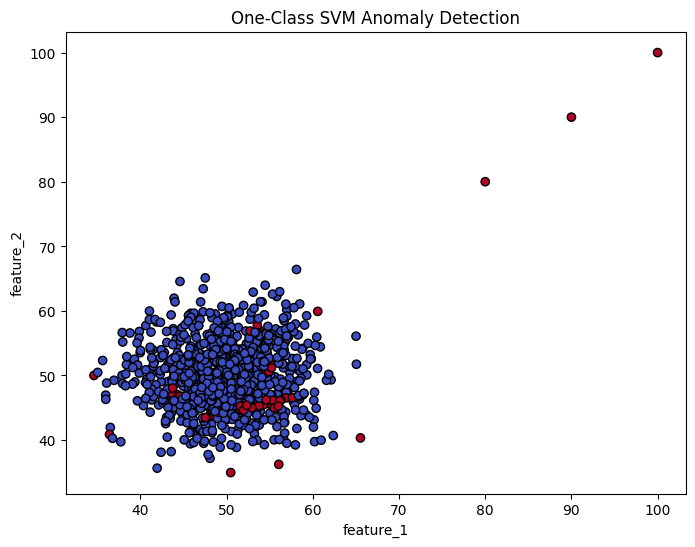

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df['feature_1'], df['feature_2'], c=df['anomaly_flag'], cmap='coolwarm', edgecolor='k')
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()


##  Integration Notes

- One-Class SVM is suitable when only normal examples are available  
- Nu parameter controls expected fraction of outliers  
- Kernel choice allows non-linear separation  
- Decision function outputs anomaly scores for thresholding


## Production Checklist

- ✔ Train on normal/historical data only  
- ✔ Apply decision function on new data  
- ✔ Nu parameter tuned to expected anomaly fraction  
- ✔ Integrate scores into pipeline or alerting system


## Key Takeaways

- OC-SVM provides flexible unsupervised anomaly detection  
- Works well for multidimensional numeric datasets  
- Produces interpretable anomaly scores and binary flags


## Next Steps

- Compare with Isolation Forest and LOF  
- Integrate into ensemble anomaly detection pipelines  
- Monitor anomaly score drift over time